In [62]:
import tensorflow as t
import numpy as n
import matplotlib.pyplot as p
import imageio

In [63]:
(trainX, trainY), (testX, testY) = t.keras.datasets.mnist.load_data()
trainX = trainX / 255
testX = testX / 255

In [64]:
print(trainX.shape, 'train shape')
print(testX.shape, 'test shape')

(60000, 28, 28) train shape
(10000, 28, 28) test shape


In [65]:
trainY = t.keras.utils.to_categorical(trainY, 10)
testY = t.keras.utils.to_categorical(testY, 10)


In [66]:
model = t.keras.models.Sequential([
    t.keras.layers.Flatten(input_shape=(28,28,1)),
      t.keras.layers.Dense(500, activation = t.nn.relu),
      t.keras.layers.Dense(10, activation = t.nn.softmax)                                
])

In [67]:
model.compile(loss=t.keras.losses.categorical_crossentropy, optimizer=t.keras.optimizers.Adam(), metrics=['accuracy'])


In [68]:
history = model.fit(trainX, trainY, batch_size=32, epochs=11)

Epoch 1/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2043 - accuracy: 0.9406
Epoch 2/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0819 - accuracy: 0.9750
Epoch 3/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0535 - accuracy: 0.9830
Epoch 4/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0354 - accuracy: 0.9883
Epoch 5/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 6/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0208 - accuracy: 0.9934
Epoch 7/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0166 - accuracy: 0.9949
Epoch 8/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0133 - accuracy: 0.9956
Epoch 9/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0131 - accuracy: 0.9955
Epoch 10/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.009

In [70]:
print(model.evaluate(trainX, trainY))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0080 - accuracy: 0.9974
[0.00804531667381525, 0.9974166750907898]


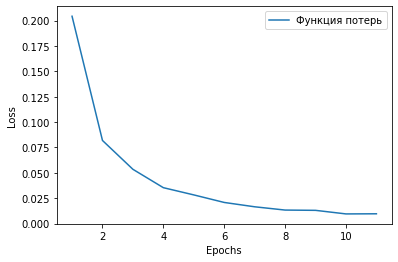

In [71]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

p.plot(epochs, loss_values, label='Функция потерь')
p.xlabel('Epochs')
p.ylabel('Loss')
p.legend()

p.show()

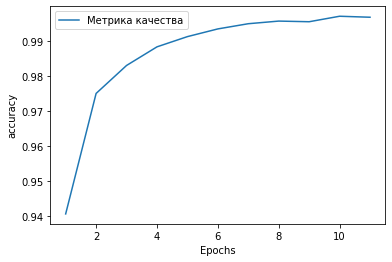

In [72]:
accu_values = history.history['accuracy']
epochs = range(1, len(accu_values)+1)
p.plot(epochs, accu_values, label='Метрика качества')
p.xlabel('Epochs')
p.ylabel('accuracy')
p.legend()

p.show()

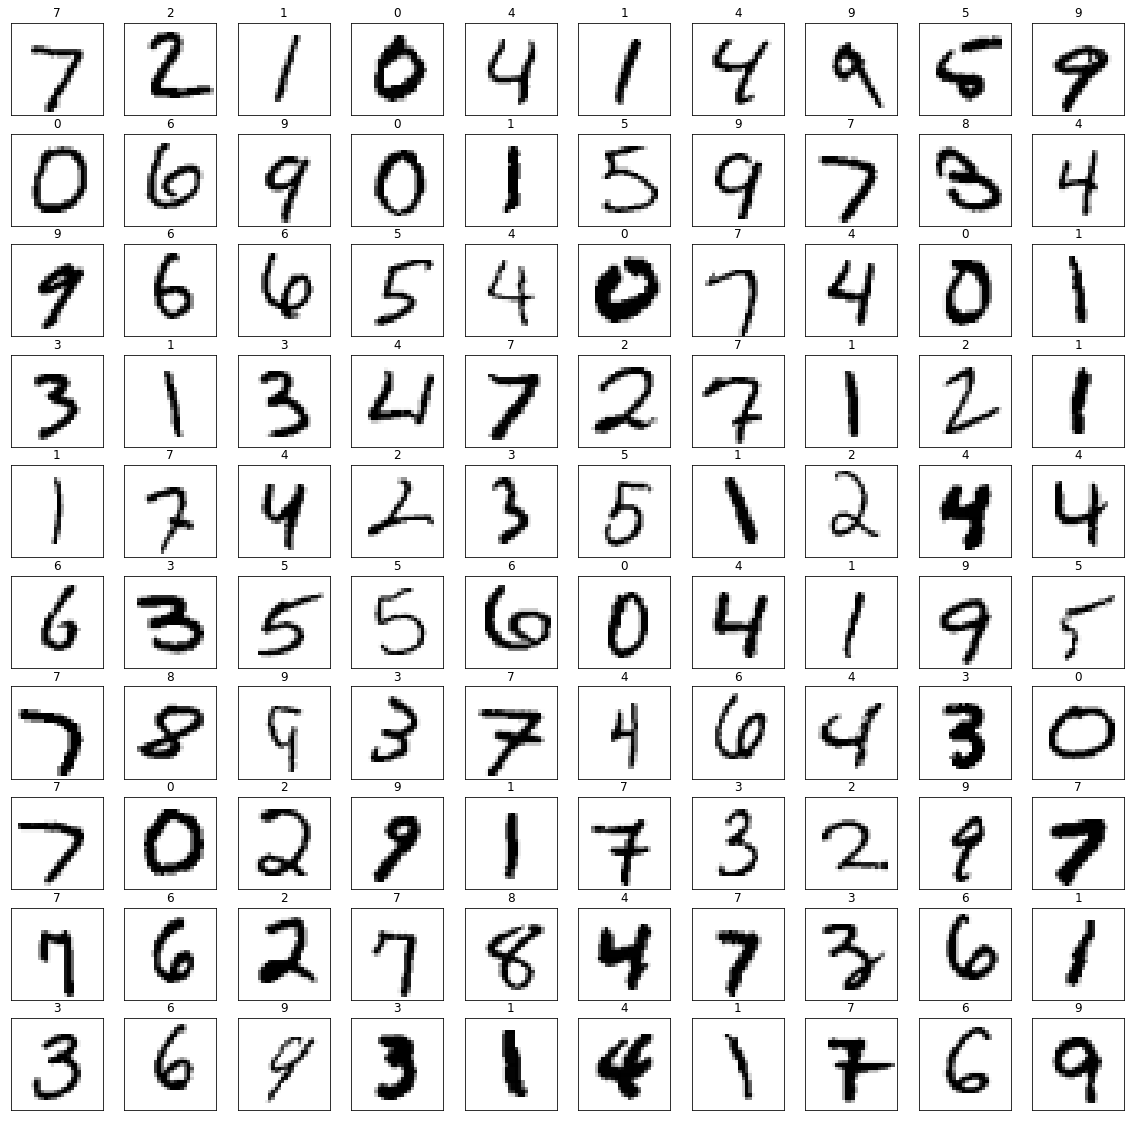

In [73]:
p.figure(figsize=(20,20))
for i in range(100):
  p.subplot(10,10, i+1)
  p.xticks([])
  p.yticks([])
  pic = n.expand_dims(testX[i], axis = 0)
  ot = model.predict(pic.reshape(-1, 28, 28, 1))
  p.imshow(testX[i], cmap=p.cm.binary)
  p.title(n.argmax(ot))
